### Problem Statement :
**To build a classification methodology to predict the type of Thyroid a person has ,based on the below features.**


- ### Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_auc_score,r2_score,roc_curve,classification_report
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("hypothyroid.csv")

In [3]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [6]:
data.shape

(3772, 30)

In [7]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [8]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

- ### Data Transformation

In [9]:
data[data.columns]=="?"

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
3768,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3769,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [10]:
column=(data[data.columns]=="?").sum()

In [11]:
column

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [12]:
column[column>=1]

age       1
sex     150
TSH     369
T3      769
TT4     231
T4U     387
FTI     385
TBG    3772
dtype: int64

In [13]:
data_copy=data.copy

In [14]:
data.shape

(3772, 30)

In [15]:
data=data.drop(columns=["TBG"],axis=1)

In [16]:
data.shape

(3772, 29)

In [17]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'Class'],
      dtype='object')

In [18]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)


In [19]:
data.shape

(3772, 23)

In [20]:
data=data[data[data.columns]!="?"]

In [21]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,t,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1,2.1,124,1.08,114,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.1,1.8,112,1.07,105,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2,82,0.94,87,SVI,negative


In [22]:
(data[data.columns]=="?").sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source              0
Class                        0
dtype: int64

______________________________

In [23]:
check_null=data.isnull().sum()

In [24]:
check_null

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [25]:
check_null[check_null>=1]

age      1
sex    150
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64

In [26]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,t,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1,2.1,124,1.08,114,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.1,1.8,112,1.07,105,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2,82,0.94,87,SVI,negative


In [27]:
data["sex"]

0       F
1       F
2       M
3       F
4       F
       ..
3767    F
3768    F
3769    F
3770    M
3771    F
Name: sex, Length: 3772, dtype: object

In [28]:
data["sex"].unique()

array(['F', 'M', nan], dtype=object)

In [29]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,t,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,1,2.1,124,1.08,114,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,5.1,1.8,112,1.07,105,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2,82,0.94,87,SVI,negative


- ### Data Normalization

In [30]:
data["sex"]=data["sex"].map({"F":0,"M":1})

In [31]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,f,f,f,f,f,f,f,f,...,f,f,f,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,f,f,f,f,f,f,f,f,...,f,f,f,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,f,f,f,f,f,f,f,f,...,f,f,f,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,t,f,f,f,f,f,f,f,...,f,f,f,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,f,f,f,f,f,f,f,f,...,f,f,f,0.72,1.2,61,0.87,70,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,f,f,f,f,f,f,f,f,...,t,f,f,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68,0.0,f,f,f,f,f,f,f,f,...,f,f,f,1,2.1,124,1.08,114,SVI,negative
3769,74,0.0,f,f,f,f,f,f,f,f,...,f,f,f,5.1,1.8,112,1.07,105,other,negative
3770,72,1.0,f,f,f,f,f,f,f,f,...,f,f,f,0.7,2,82,0.94,87,SVI,negative


In [32]:
for column in data.columns:
    if len(data[column].unique())==2:
        data[column]=data[column].map({"f":0,"t":1})

In [33]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,Class
0,41,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1.3,2.5,125,1.14,109,SVHC,negative
1,23,0.0,0,0,0,0,0,0,0,0,...,0,0,0,4.1,2,102,NaN,NaN,other,negative
2,46,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.98,NaN,109,0.91,120,other,negative
3,70,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0.16,1.9,175,NaN,NaN,other,negative
4,70,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0.72,1.2,61,0.87,70,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,1,0,0,NaN,NaN,NaN,NaN,NaN,other,negative
3768,68,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,2.1,124,1.08,114,SVI,negative
3769,74,0.0,0,0,0,0,0,0,0,0,...,0,0,0,5.1,1.8,112,1.07,105,other,negative
3770,72,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0.7,2,82,0.94,87,SVI,negative


In [34]:
data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [35]:
pd.get_dummies(data=data["referral_source"])

,STMW,SVHC,SVHD,SVI,other
0,False,True,False,False,False
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,True,False
...,...,...,...,...,...
3767,False,False,False,False,True
3768,False,False,False,True,False
3769,False,False,False,False,True
3770,False,False,False,True,False


In [36]:
data=pd.get_dummies(data=data,columns=["referral_source"],drop_first=True)

In [37]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,negative,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,negative,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,negative,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,negative,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,negative,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,negative,False,False,False,True
3768,68,0.0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,negative,False,False,True,False
3769,74,0.0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,negative,False,False,False,True
3770,72,1.0,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,negative,False,False,True,False


In [38]:
data.shape

(3772, 26)

In [39]:
data.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
Class                          0
referral_source_SVHC           0
referral_source_SVHD           0
referral_source_SVI            0
referral_source_other          0
dtype: int64

In [40]:
data.shape

(3772, 26)

In [41]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,negative,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,negative,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,negative,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,negative,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,negative,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,negative,False,False,False,True
3768,68,0.0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,negative,False,False,True,False
3769,74,0.0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,negative,False,False,False,True
3770,72,1.0,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,negative,False,False,True,False


In [42]:
lblEn=LabelEncoder()
data["Class"]=lblEn.fit_transform(data["Class"])

In [43]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,1,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,1,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,1,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,1,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1,False,False,False,True
3768,68,0.0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,1,False,False,True,False
3769,74,0.0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,1,False,False,False,True
3770,72,1.0,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,1,False,False,True,False


In [44]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,1,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,1,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,1,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,1,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,1,False,False,True,False


In [45]:
data.describe(include="all")

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3771,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3403,3003,3541,3385,3387,3772.000000,3772,3772,3772,3772
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,287,69,241,146,234,NaN,2,2,2,2
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,2,101,0.99,100,NaN,False,False,False,True
freq,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116,238,71,95,73,NaN,3386,3733,2738,2201
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,NaN,NaN,NaN,NaN,NaN,0.974814,NaN,NaN,NaN,NaN
std,NaN,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,NaN,NaN,NaN,NaN,NaN,0.279508,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [46]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,1.3,2.5,125,1.14,109,1,True,False,False,False
1,23,0.0,0,0,0,0,0,0,0,0,...,4.1,2,102,NaN,NaN,1,False,False,False,True
2,46,1.0,0,0,0,0,0,0,0,0,...,0.98,NaN,109,0.91,120,1,False,False,False,True
3,70,0.0,1,0,0,0,0,0,0,0,...,0.16,1.9,175,NaN,NaN,1,False,False,False,True
4,70,0.0,0,0,0,0,0,0,0,0,...,0.72,1.2,61,0.87,70,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,1,False,False,False,True
3768,68,0.0,0,0,0,0,0,0,0,0,...,1,2.1,124,1.08,114,1,False,False,True,False
3769,74,0.0,0,0,0,0,0,0,0,0,...,5.1,1.8,112,1.07,105,1,False,False,False,True
3770,72,1.0,0,0,0,0,0,0,0,0,...,0.7,2,82,0.94,87,1,False,False,True,False


In [47]:
check_null=data.isnull().sum()

In [48]:
check_null[check_null>=1]

age      1
sex    150
TSH    369
T3     769
TT4    231
T4U    387
FTI    385
dtype: int64

In [49]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3,weights="uniform",missing_values=np.nan)
imputer_array=imputer.fit_transform(data)

In [50]:
imputer_array

array([[41.,  0.,  0., ...,  0.,  0.,  0.],
       [23.,  0.,  0., ...,  0.,  0.,  1.],
       [46.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [74.,  0.,  0., ...,  0.,  0.,  1.],
       [72.,  1.,  0., ...,  0.,  1.,  0.],
       [64.,  0.,  0., ...,  0.,  0.,  1.]])

In [51]:
imputer_array.shape

(3772, 26)

In [52]:
new_data=pd.DataFrame(data=np.round(imputer_array),columns=data.columns)

In [53]:
new_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,125.0,1.0,109.0,1.0,1.0,0.0,0.0,0.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,102.0,1.0,108.0,1.0,0.0,0.0,0.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,109.0,1.0,120.0,1.0,0.0,0.0,0.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,175.0,1.0,177.0,1.0,0.0,0.0,0.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,61.0,1.0,70.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,131.0,1.0,117.0,1.0,0.0,0.0,0.0,1.0
3768,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,124.0,1.0,114.0,1.0,0.0,0.0,1.0,0.0
3769,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,112.0,1.0,105.0,1.0,0.0,0.0,0.0,1.0
3770,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,82.0,1.0,87.0,1.0,0.0,0.0,1.0,0.0


In [54]:
new_data.shape

(3772, 26)

In [55]:
new_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.737275,0.307529,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,4.830594,2.027837,108.542153,1.020944,110.363468,0.974814,0.102333,0.010339,0.274125,0.583510
std,20.082478,0.461532,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,23.323891,0.786399,35.009868,0.165546,32.275460,0.279508,0.303126,0.101169,0.446131,0.493042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,530.000000,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   float64
 2   on_thyroxine               3772 non-null   float64
 3   query_on_thyroxine         3772 non-null   float64
 4   on_antithyroid_medication  3772 non-null   float64
 5   sick                       3772 non-null   float64
 6   pregnant                   3772 non-null   float64
 7   thyroid_surgery            3772 non-null   float64
 8   I131_treatment             3772 non-null   float64
 9   query_hypothyroid          3772 non-null   float64
 10  query_hyperthyroid         3772 non-null   float64
 11  lithium                    3772 non-null   float64
 12  goitre                     3772 non-null   float64
 13  tumor                      3772 non-null   float

In [57]:
new_data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

In [58]:
new_data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'Class', 'referral_source_SVHC', 'referral_source_SVHD',
       'referral_source_SVI', 'referral_source_other'],
      dtype='object')

- ### Data Visualization

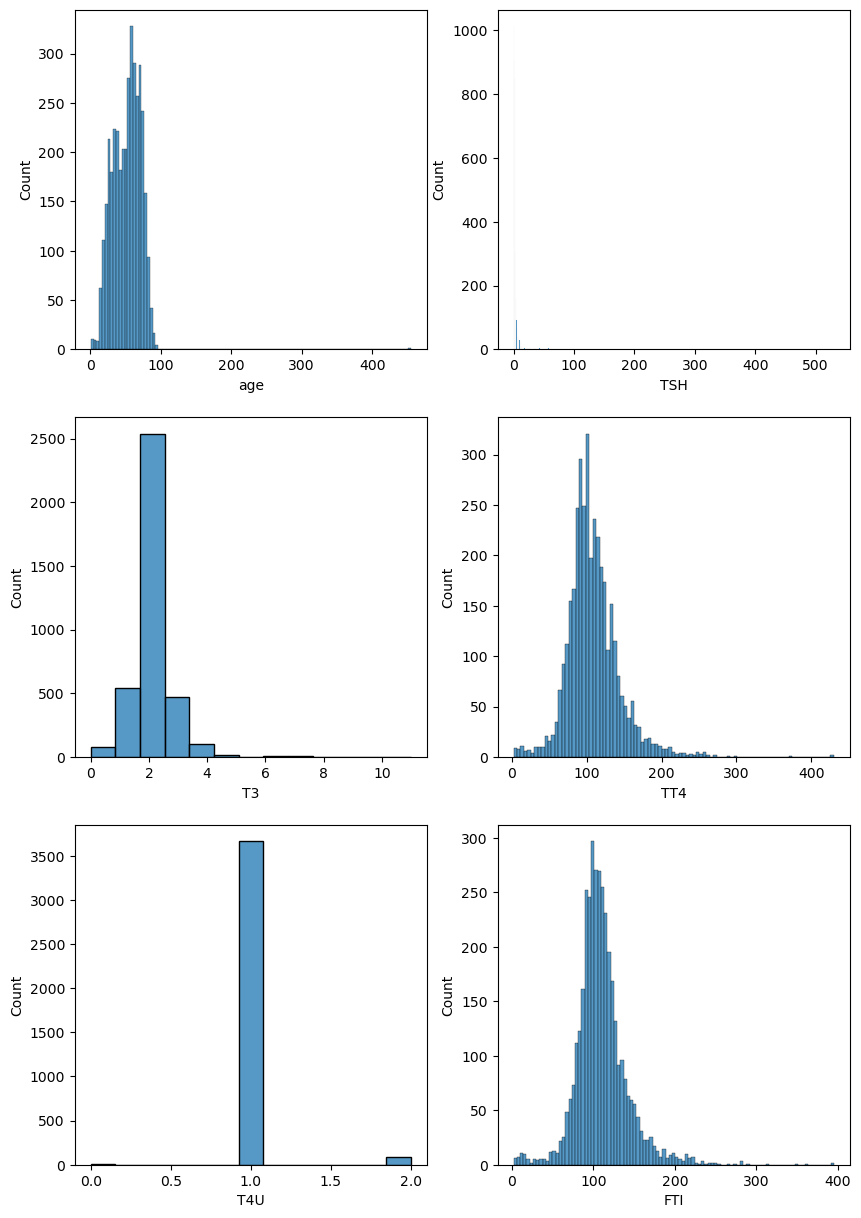

In [59]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.histplot(new_data[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

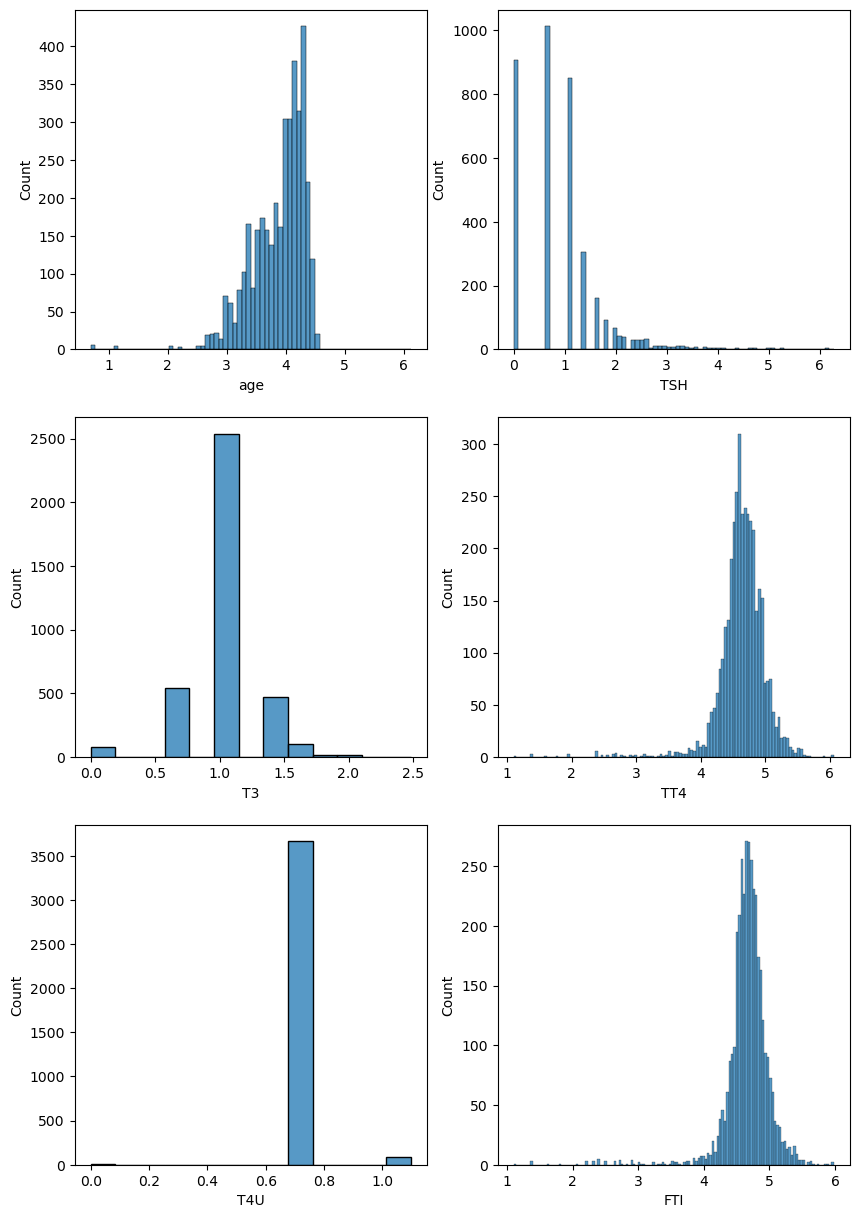

In [60]:
columns = ['age','TSH','T3','TT4','T4U','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_data[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.histplot(np.log(new_data[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


In [61]:

new_data = new_data.drop(['TSH'],axis=1)

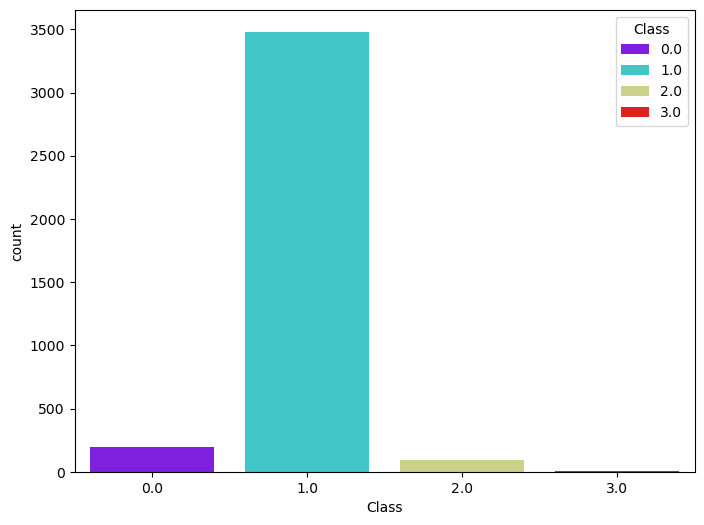

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have new_data defined
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=new_data,hue="Class",palette="rainbow")

plt.show()

In [63]:
X = new_data.drop(['Class'],axis=1)
y = new_data['Class']
rdsmple = RandomOverSampler()
X_sampled,y_sampled  = rdsmple.fit_resample(X,y)

In [64]:

X_sampled.shape

(13924, 24)

In [65]:
X_sampled = pd.DataFrame(data = X_sampled, columns = X.columns)


In [66]:
X_sampled = pd.DataFrame(data = X_sampled, columns = X.columns)


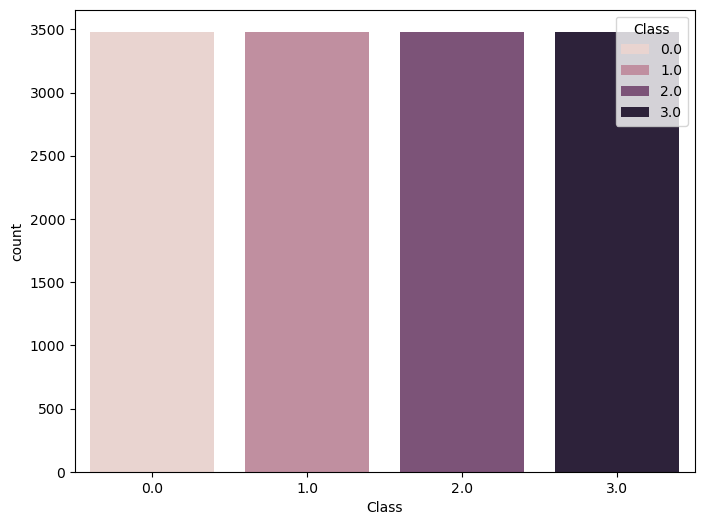

In [67]:

plt.figure(figsize=(8, 6))
sns.countplot(x=y_sampled,hue=y_sampled)

plt.show()

- ### Model Training

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
rf_clf = DecisionTreeClassifier(random_state=42)

In [69]:
rf_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [70]:

rf_clf.predict(X_train)

array([1., 0., 1., ..., 1., 1., 1.])

In [71]:
rf_clf.score(X_test, y_test)

0.8940397350993378

In [72]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
model_y_pred = svm_clf.predict(X_test)

In [73]:

svm_clf.score(X_test, y_test)

0.9298013245033112

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_y_pred = knn_clf.predict(X_test)
knn_clf.score(X_test,y_test)

0.9258278145695364

- ### Validation

In [75]:
from sklearn.model_selection import cross_val_score

classifiers = [rf_clf, svm_clf, knn_clf]

for classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=2)   
    print(f"{classifier.__class__.__name__} Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}\n")

DecisionTreeClassifier Cross-Validation Scores: [0.89448568 0.88388123]
Mean Accuracy: 0.8891834570519619

SVC Cross-Validation Scores: [0.93319194 0.93584305]
Mean Accuracy: 0.9345174973488866

KNeighborsClassifier Cross-Validation Scores: [0.92841994 0.93372216]
Mean Accuracy: 0.9310710498409331



- ### Performance Evaluation

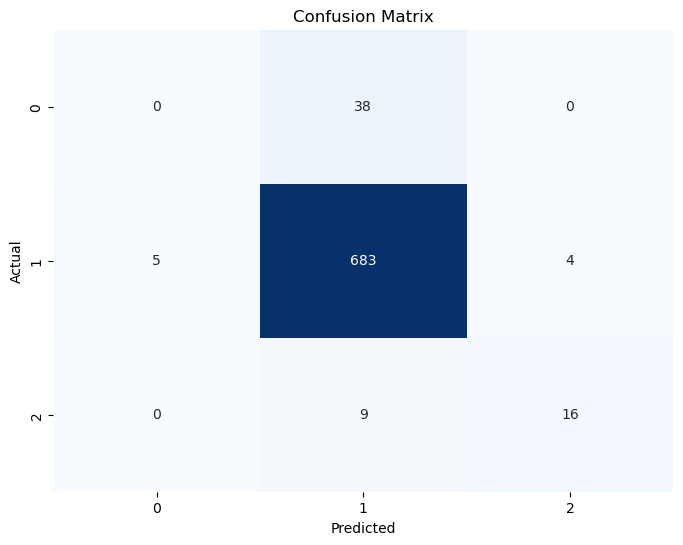

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = knn_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        38
         1.0       0.94      0.99      0.96       692
         2.0       0.80      0.64      0.71        25

    accuracy                           0.93       755
   macro avg       0.58      0.54      0.56       755
weighted avg       0.88      0.93      0.90       755



--------------------